In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import re

In [2]:
data = pd.read_csv('../data/data_ml.csv')
data.head()

,date,sales_rate_comparison,avg_rate_compt,weekday_sazonality_guh,occup_competitors,imat_sp,event_sazonality_guh,sold_rooms_guh,occup_rate_guh,avg_rate_guh,holidays_sazonality_guh,vacation_sazonality
0,2022-09-03,-0.5039,410.93,5.0,0.6922,0.959,0.0,13.0,1.0000,346.93,0.0,1.0
1,2022-09-04,0.0000,390.67,1.0,0.6922,0.959,0.0,9.0,0.6923,263.58,0.0,1.0
2,2022-09-05,-0.3103,398.69,2.0,0.6922,0.959,0.0,7.0,0.5385,353.13,0.0,1.0
3,2022-09-06,-0.8272,432.25,3.0,0.6922,0.959,0.0,6.0,0.4615,283.95,-1.0,1.0
4,2022-09-07,-0.5062,442.07,3.0,0.6922,0.959,0.0,9.0,0.6923,334.38,-1.0,1.0


In [3]:
data.describe(include='all')

,date,sales_rate_comparison,avg_rate_compt,weekday_sazonality_guh,occup_competitors,imat_sp,event_sazonality_guh,sold_rooms_guh,occup_rate_guh,avg_rate_guh,holidays_sazonality_guh,vacation_sazonality
count,363,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
unique,363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-0.714693,452.838017,3.280992,0.640059,1.003878,0.247934,9.107438,0.700578,361.105702,0.046832,0.449036
std,NaN,0.175152,79.412559,1.385939,0.073149,0.046737,0.735234,3.532333,0.271723,51.121173,0.515516,0.894747
min,NaN,-1.000000,313.890000,1.000000,0.508200,0.930000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,NaN,-0.840800,401.020000,2.000000,0.595100,0.980000,0.000000,6.000000,0.461500,344.590000,0.000000,-1.000000
50%,NaN,-0.737200,441.860000,3.000000,0.646800,1.004000,0.000000,10.000000,0.769200,362.510000,0.000000,1.000000
75%,NaN,-0.607750,485.960000,5.000000,0.687200,1.015500,0.000000,12.000000,0.923100,384.935000,0.000000,1.000000


In [4]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     363 non-null    datetime64[ns]
 1   sales_rate_comparison    363 non-null    float64       
 2   avg_rate_compt           363 non-null    float64       
 3   weekday_sazonality_guh   363 non-null    float64       
 4   occup_competitors        363 non-null    float64       
 5   imat_sp                  363 non-null    float64       
 6   event_sazonality_guh     363 non-null    float64       
 7   sold_rooms_guh           363 non-null    float64       
 8   occup_rate_guh           363 non-null    float64       
 9   avg_rate_guh             363 non-null    float64       
 10  holidays_sazonality_guh  363 non-null    float64       
 11  vacation_sazonality      363 non-null    float64       
 12  year                     363 non-nul

In [5]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     363 non-null    datetime64[ns]
 1   sales_rate_comparison    363 non-null    float64       
 2   avg_rate_compt           363 non-null    float64       
 3   weekday_sazonality_guh   363 non-null    float64       
 4   occup_competitors        363 non-null    float64       
 5   imat_sp                  363 non-null    float64       
 6   event_sazonality_guh     363 non-null    float64       
 7   sold_rooms_guh           363 non-null    float64       
 8   occup_rate_guh           363 non-null    float64       
 9   avg_rate_guh             363 non-null    float64       
 10  holidays_sazonality_guh  363 non-null    float64       
 11  vacation_sazonality      363 non-null    float64       
 12  year                     363 non-nul

In [6]:
data.head()

,date,sales_rate_comparison,avg_rate_compt,weekday_sazonality_guh,occup_competitors,imat_sp,event_sazonality_guh,sold_rooms_guh,occup_rate_guh,avg_rate_guh,holidays_sazonality_guh,vacation_sazonality,year,month,day
0,2022-09-03,-0.5039,410.93,5.0,0.6922,0.959,0.0,13.0,1.0000,346.93,0.0,1.0,2022,9,3
1,2022-09-04,0.0000,390.67,1.0,0.6922,0.959,0.0,9.0,0.6923,263.58,0.0,1.0,2022,9,4
2,2022-09-05,-0.3103,398.69,2.0,0.6922,0.959,0.0,7.0,0.5385,353.13,0.0,1.0,2022,9,5
3,2022-09-06,-0.8272,432.25,3.0,0.6922,0.959,0.0,6.0,0.4615,283.95,-1.0,1.0,2022,9,6
4,2022-09-07,-0.5062,442.07,3.0,0.6922,0.959,0.0,9.0,0.6923,334.38,-1.0,1.0,2022,9,7


In [7]:
data_corr = data.drop(['date'], axis=1)
data_corr.head()

,sales_rate_comparison,avg_rate_compt,weekday_sazonality_guh,occup_competitors,imat_sp,event_sazonality_guh,sold_rooms_guh,occup_rate_guh,avg_rate_guh,holidays_sazonality_guh,vacation_sazonality,year,month,day
0,-0.5039,410.93,5.0,0.6922,0.959,0.0,13.0,1.0000,346.93,0.0,1.0,2022,9,3
1,0.0000,390.67,1.0,0.6922,0.959,0.0,9.0,0.6923,263.58,0.0,1.0,2022,9,4
2,-0.3103,398.69,2.0,0.6922,0.959,0.0,7.0,0.5385,353.13,0.0,1.0,2022,9,5
3,-0.8272,432.25,3.0,0.6922,0.959,0.0,6.0,0.4615,283.95,-1.0,1.0,2022,9,6
4,-0.5062,442.07,3.0,0.6922,0.959,0.0,9.0,0.6923,334.38,-1.0,1.0,2022,9,7


In [8]:
avg_rate_guhs = data_corr.pop('avg_rate_guh')
data_corr['avg_rate_guh'] = avg_rate_guhs
data_corr = data_corr.drop(data_corr[data_corr['avg_rate_guh'] == 0.00].index)
data_corr.head()

,sales_rate_comparison,avg_rate_compt,weekday_sazonality_guh,occup_competitors,imat_sp,event_sazonality_guh,sold_rooms_guh,occup_rate_guh,holidays_sazonality_guh,vacation_sazonality,year,month,day,avg_rate_guh
0,-0.5039,410.93,5.0,0.6922,0.959,0.0,13.0,1.0000,0.0,1.0,2022,9,3,346.93
1,0.0000,390.67,1.0,0.6922,0.959,0.0,9.0,0.6923,0.0,1.0,2022,9,4,263.58
2,-0.3103,398.69,2.0,0.6922,0.959,0.0,7.0,0.5385,0.0,1.0,2022,9,5,353.13
3,-0.8272,432.25,3.0,0.6922,0.959,0.0,6.0,0.4615,-1.0,1.0,2022,9,6,283.95
4,-0.5062,442.07,3.0,0.6922,0.959,0.0,9.0,0.6923,-1.0,1.0,2022,9,7,334.38


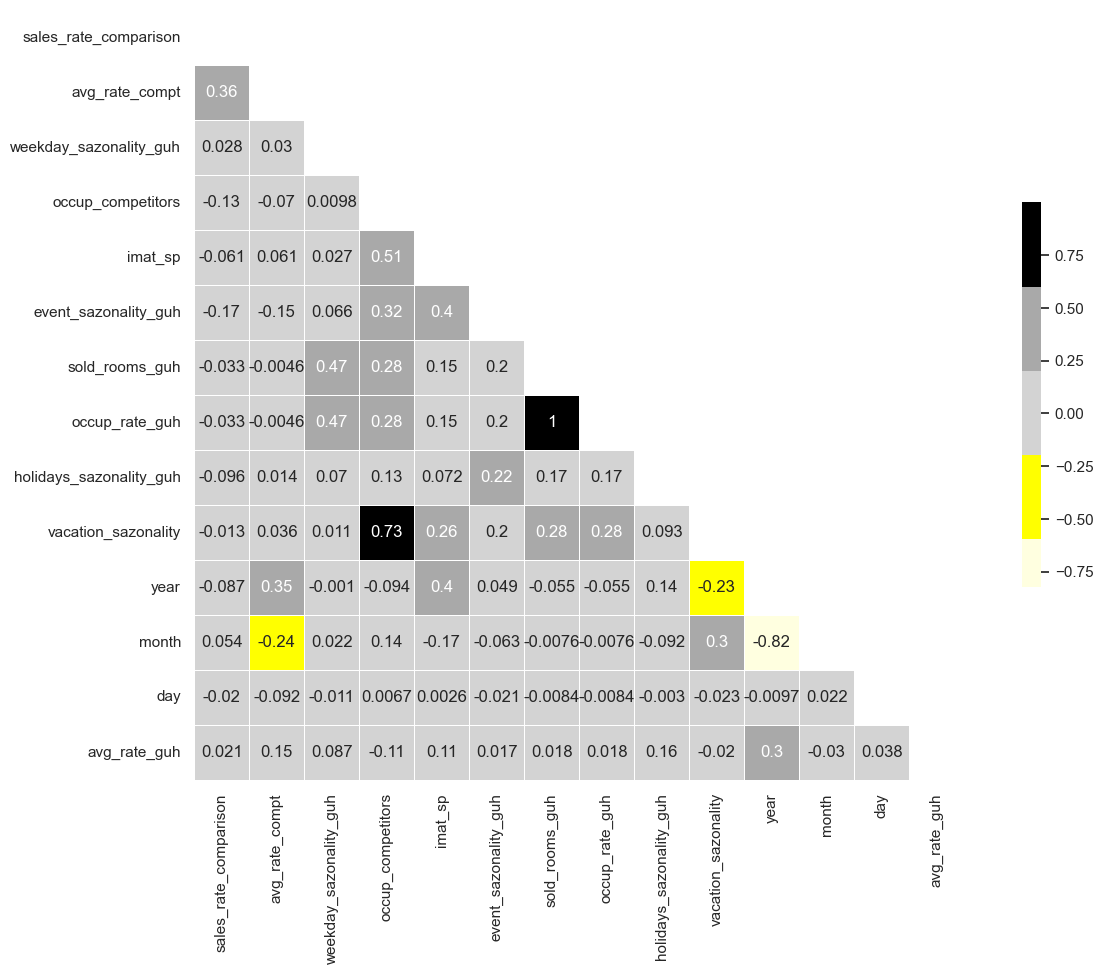

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

plt.figure(figsize=(15, 10))

# Define the custom color palette
colors = ['lightyellow', 'yellow', 'lightgray', 'darkgray', 'black']
cmap = ListedColormap(colors)

sns.set(style='white')
mask = np.triu(np.ones_like(data_corr.corr(), dtype=bool))

sns.heatmap(data_corr.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

In [13]:
data_corr = data_corr.drop(['sold_rooms_guh'], axis=1)

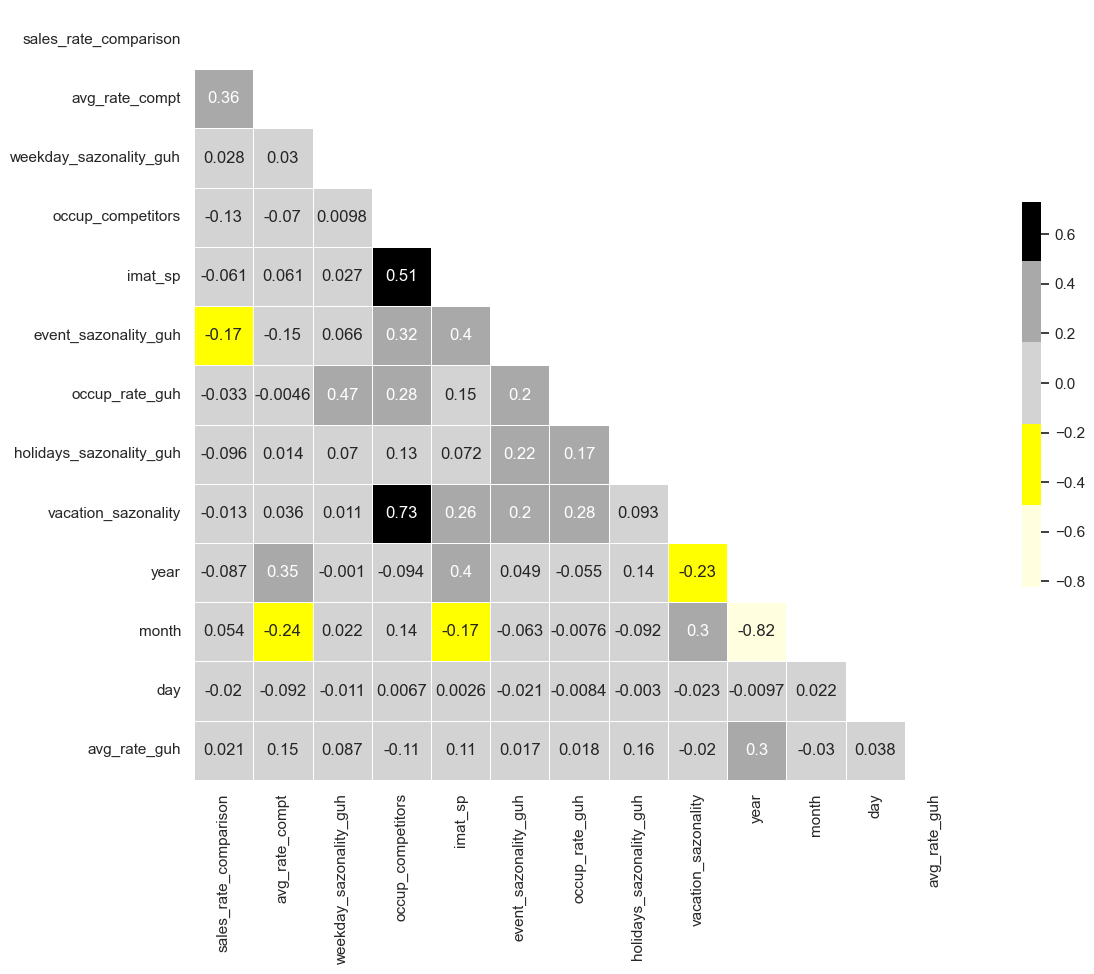

In [14]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15, 10))

# Define the custom color palette
colors = ['lightyellow', 'yellow', 'lightgray', 'darkgray', 'black']
cmap = ListedColormap(colors)

sns.set(style='white')
mask = np.triu(np.ones_like(data_corr.corr(), dtype=bool))

sns.heatmap(data_corr.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

<Figure size 1500x1000 with 0 Axes>

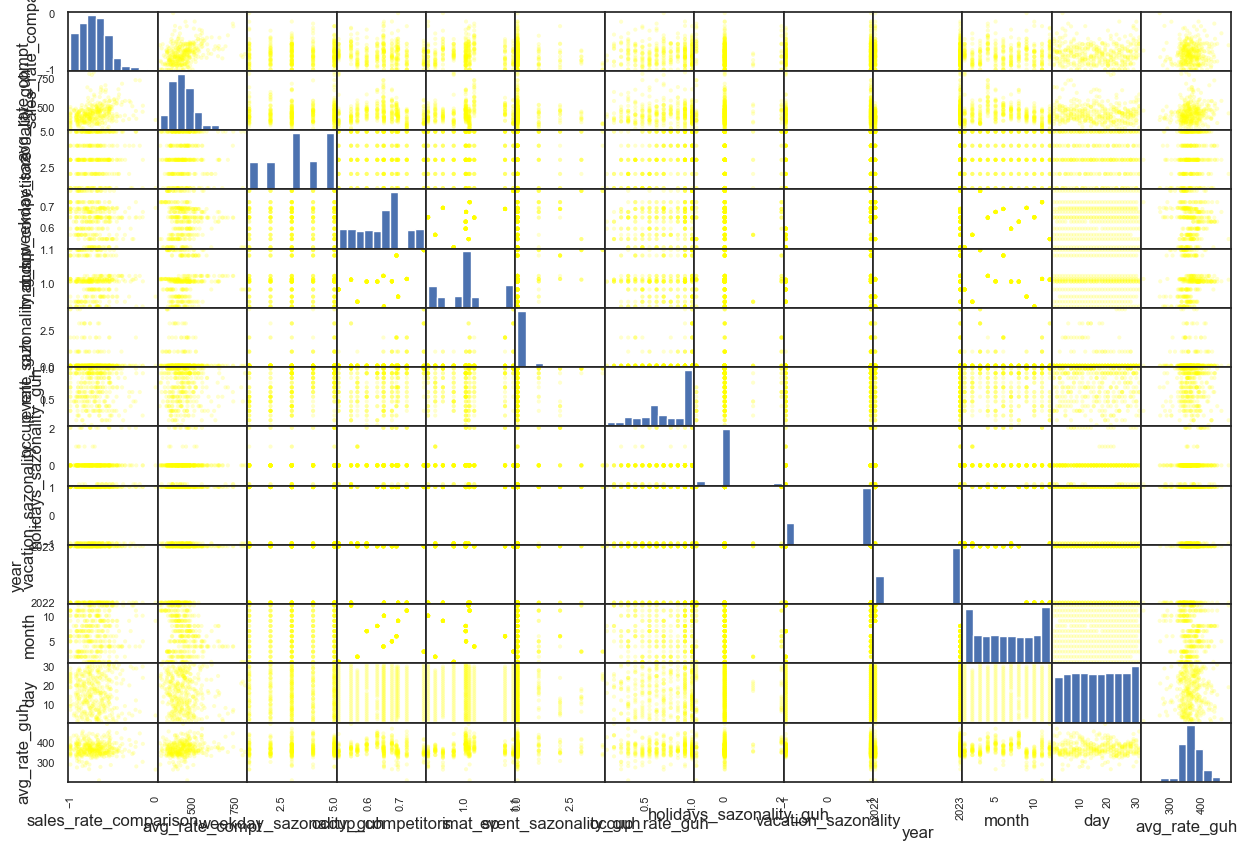

In [19]:
plt.figure(figsize=(15, 10))

# Set the color for the markers
color = 'yellow'

pd.plotting.scatter_matrix(data_corr, figsize=(15, 10), alpha=0.2, c=color)

plt.show()

In [20]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

In [21]:
data_corr.to_csv('../data/data_h20.csv', index=False)

test_price = data_corr[data_corr['month'] == 8]
test_price.to_csv('../data/data_h20_test_price.csv', index=False)

test_h2o = test_price.drop(['avg_rate_guh'], axis=1)
test_h2o.to_csv('../data/data_h20_test_noprice.csv', index=False)             

In [22]:
train=pd.read_csv('../data/data_h20.csv')

test=pd.read_csv('../data/data_h20_test_noprice.csv')

train.head()

,sales_rate_comparison,avg_rate_compt,weekday_sazonality_guh,occup_competitors,imat_sp,event_sazonality_guh,occup_rate_guh,holidays_sazonality_guh,vacation_sazonality,year,month,day,avg_rate_guh
0,-0.5039,410.93,5.0,0.6922,0.959,0.0,1.0000,0.0,1.0,2022,9,3,346.93
1,0.0000,390.67,1.0,0.6922,0.959,0.0,0.6923,0.0,1.0,2022,9,4,263.58
2,-0.3103,398.69,2.0,0.6922,0.959,0.0,0.5385,0.0,1.0,2022,9,5,353.13
3,-0.8272,432.25,3.0,0.6922,0.959,0.0,0.4615,-1.0,1.0,2022,9,6,283.95
4,-0.5062,442.07,3.0,0.6922,0.959,0.0,0.6923,-1.0,1.0,2022,9,7,334.38


In [23]:
test.head()

,sales_rate_comparison,avg_rate_compt,weekday_sazonality_guh,occup_competitors,imat_sp,event_sazonality_guh,occup_rate_guh,holidays_sazonality_guh,vacation_sazonality,year,month,day
0,-0.7012,481.66,3.0,0.6278,1.0033,0.0,0.6923,0.0,1.0,2023,8,2
1,-0.8611,473.19,4.0,0.6278,1.0033,0.0,0.8462,0.0,1.0,2023,8,3
2,-0.9333,410.04,5.0,0.6278,1.0033,0.0,0.9231,0.0,1.0,2023,8,4
3,-0.7363,449.22,5.0,0.6278,1.0033,0.0,0.9231,0.0,1.0,2023,8,5
4,-0.6923,513.51,2.0,0.6278,1.0033,0.0,0.5385,0.0,1.0,2023,8,7


In [24]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.381-b09, mixed mode)
  Starting server from C:\Users\demia\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\demia\AppData\Local\Temp\tmpuskry38s
  JVM stdout: C:\Users\demia\AppData\Local\Temp\tmpuskry38s\h2o_demia_started_from_python.out
  JVM stderr: C:\Users\demia\AppData\Local\Temp\tmpuskry38s\h2o_demia_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,14 days and 14 minutes
H2O_cluster_name:,H2O_from_python_demia_0msfmx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.733 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [25]:
h2train=h2o.H2OFrame(train)
h2test=h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
h2train.columns

['sales_rate_comparison',
 'avg_rate_compt',
 'weekday_sazonality_guh',
 'occup_competitors',
 'imat_sp',
 'event_sazonality_guh',
 'occup_rate_guh',
 'holidays_sazonality_guh',
 'vacation_sazonality',
 'year',
 'month',
 'day',
 'avg_rate_guh']

In [27]:
X=[c for c in h2train.columns if c!='avg_rate_guh']

y='avg_rate_guh'

In [28]:
automl=H2OAutoML(max_models=10,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')

In [29]:
automl.train(x=X,
             y=y,
             training_frame=h2train)

AutoML progress: |
16:33:47.843: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20230905_163347


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    29                 29                          81725                  13           20           16.1379       202           237           220

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 737.2112670949333
RMSE: 27.15163470391669
MAE: 18.954944062109266
RMSLE: 0.07747180690709676
Mean Residual Deviance: 737.2112670949333

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 725.9565946659574
RMSE: 26.943581697056487
MAE: 18.538675090396634
RMSLE: 0.07698949628707998
Mean Residual Deviance: 725.9565946659574

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     18.5673   1.68126     19.6475       18.5013       17.1608       20.7735       16.7535
mean_residual_deviance  729.899   62.0601     756.701       743.228       620.017       766.003       763.547
mse                     729.899   62.0601     756.701       743.228       620.017       766.003       763.547
r2                      0.365783  0.0990517   0.298403      0.395073      0.479904      0.42246       0.233076
residual_deviance       729.899   62.0601     756.701       743.228       620.017       766.003       763.547
rmse                    26.9959   1.18261     27.5082       27.2622       24.9001       27.6768       27.6324
rmsle                   0.076885  0.00686373  0.0788719     0.0763627     0.0672896     0.0755147     0.0863862

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-09-05 16:33:49  0.766 sec   0                  nan              nan             nan
    2023-09-05 16:33:49  0.794 sec   5                  33.6412          23.3724         1131.73
    2023-09-05 16:33:49  0.822 sec   10                 30.575           21.408          934.832
    2023-09-05 16:33:49  0.851 sec   15                 29.318           20.8343         859.545
    2023-09-05 16:33:49  0.878 sec   20                 27.9752          19.6617         782.614
    2023-09-05 16:33:50  0.903 sec   25                 27.2943          19.1481         744.977
    2023-09-05 16:33:50  0.928 sec   29                 27.1516          18.9549         737.211

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
imat_sp                  1.45966e+06            1                    0.181175
occup_competitors        1.10438e+06            0.756602             0.137078
day                      1.01925e+06            0.698279             0.126511
avg_rate_compt           894216                 0.61262              0.110992
occup_rate_guh           861227                 0.59002              0.106897
sales_rate_comparison    740665                 0.507424             0.0919327
month                    666134                 0.456363             0.0826818
weekday_sazonality_guh   504431                 0.345582             0.0626109
holidays_sazonality_guh  342945                 0.234949             0.042567
year                     218150                 0.149453             0.0270772
event_sazonality_guh     141118                 0.0966785            0.017

In [30]:
print('[INFO] Leader board:')

leader_board=automl.leaderboard

leader_board.head()

[INFO] Leader board:


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DRF_1_AutoML_1_20230905_163347,26.9436,725.957,18.5387,0.0769895,725.957
StackedEnsemble_AllModels_1_AutoML_1_20230905_163347,26.9889,728.399,18.7582,0.0770042,728.399
StackedEnsemble_BestOfFamily_1_AutoML_1_20230905_163347,27.1853,739.04,18.8857,0.0774377,739.04
XRT_1_AutoML_1_20230905_163347,27.2442,742.247,19.0299,0.0772285,742.247
GBM_3_AutoML_1_20230905_163347,27.5325,758.037,19.4345,0.0783965,758.037
GBM_4_AutoML_1_20230905_163347,27.5956,761.52,19.3362,0.0786276,761.52
GBM_5_AutoML_1_20230905_163347,27.7138,768.056,19.3445,0.079354,768.056
GBM_2_AutoML_1_20230905_163347,28.0179,785,19.7967,0.079501,785
GBM_grid_1_AutoML_1_20230905_163347_model_1,28.3365,802.958,19.9467,0.081181,802.958
GLM_1_AutoML_1_20230905_163347,29.7714,886.338,21.0717,0.0834727,886.338
